In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [68]:
df = pd.read_csv('../data/scaled.csv')

In [10]:
df.head()

,url,ten_san_pham,ngay_dang,nam_sx,nhien_lieu,kieu_dang,tinh_trang,so_km,hop_so,xuat_xu,dia_diem,gia_ban
0,https://oto.com.vn/mua-ban-xe-byd-sealion-8-ha...,BYD Sealion 8 2025,06/08/2025,2025,Điện,SUV,Xe mới,0.0,Số tự động,Nhập khẩu,Long Biên - Hà Nội,1.569
1,https://oto.com.vn/mua-ban-xe-vinfast-lux-a20-...,VinFast LUX A2.0 Cao cấp 2021,23/10/2025,2021,Máy xăng,Sedan,Xe cũ,1.0,Số tự động,Nhập khẩu,Hải Phòng,0.595
2,https://oto.com.vn/mua-ban-xe-mg-hs-hcm/gam-ca...,MG HS 1.5T Del 2024,12/08/2025,2024,Máy xăng,Crossover,Xe mới,0.0,Số hỗn hợp,Nhập khẩu,Quận 12 - Tp.HCM,0.700
3,https://oto.com.vn/mua-ban-xe-hyundai-grand-i1...,Hyundai Grand i10 Sedan 1.2 MT 2022,06/10/2025,2022,Máy xăng,Sedan,Xe cũ,164969.0,Số sàn,Trong nước,Ngũ Hành Sơn - Đà Nẵng,0.168
4,https://oto.com.vn/mua-ban-xe-hyundai-grand-i1...,Hyundai Grand i10 Hatchback 1.2 AT 2024,03/10/2025,2024,Máy xăng,Hatchback,Xe cũ,16000.0,Số tự động,Trong nước,Quốc Oai - Hà Nội,0.415


In [4]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

## BIỂU ĐỒ 1: Phân bố kiểu dáng xe

C:\Users\PC\AppData\Local\Temp\ipykernel_9108\1776804609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='kieu_dang', order=df['kieu_dang'].value_counts().index, palette='Set2')


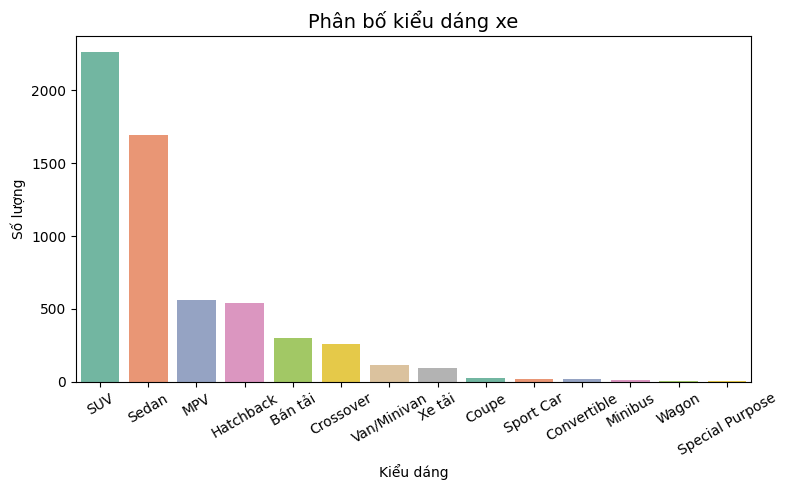

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='kieu_dang', order=df['kieu_dang'].value_counts().index, palette='Set2')
plt.title('Phân bố kiểu dáng xe', fontsize=14)
plt.xlabel('Kiểu dáng')
plt.ylabel('Số lượng')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('../img/pl_1.png', dpi=450)
plt.show()

## BIỂU ĐỒ 2: Tỷ lệ loại nhiên liệu

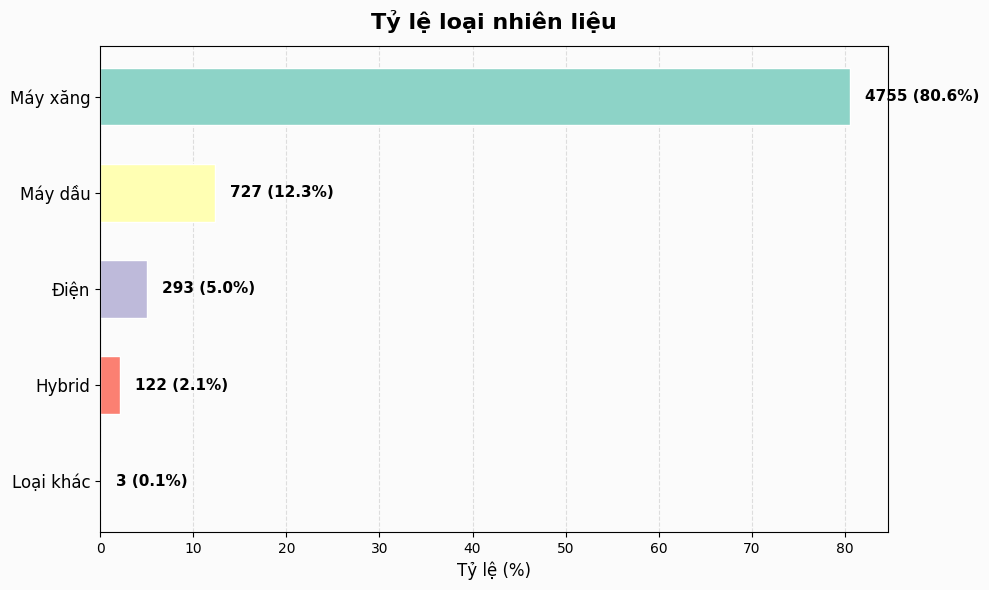

In [18]:
fuel_counts = df['nhien_lieu'].value_counts()
fuel_perc = fuel_counts / fuel_counts.sum() * 100

# Màu nhẹ, chuyên nghiệp
colors = sns.color_palette("Set3", n_colors=len(fuel_counts))

fig, ax = plt.subplots(figsize=(10, 6))
y_pos = range(len(fuel_counts))

# Vẽ bar ngang
ax.barh(y_pos, fuel_perc.values, color=colors, edgecolor='white', height=0.6)

# Trục y: tên loại nhiên liệu
ax.set_yticks(y_pos)
ax.set_yticklabels(fuel_counts.index, fontsize=12)
ax.invert_yaxis()  # cho loại nhiều nhất lên trên

# Nhãn và tiêu đề
ax.set_xlabel('Tỷ lệ (%)', fontsize=12)
ax.set_title('Tỷ lệ loại nhiên liệu', fontsize=16, fontweight='bold', pad=12)

# Hiển thị số lượng + % ở cuối mỗi thanh
xmax = max(fuel_perc.values) if len(fuel_perc)>0 else 1
for i, (pct, cnt) in enumerate(zip(fuel_perc.values, fuel_counts.values)):
    ax.text(pct + xmax*0.02, i, f"{cnt} ({pct:.1f}%)",
            va='center', fontsize=11, fontweight='semibold')

# Thêm lưới nhẹ theo trục x để dễ so sánh
ax.xaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Nền nhẹ
fig.patch.set_facecolor('#fbfbfb')
ax.set_facecolor('#fbfbfb')

plt.tight_layout()
plt.savefig('../img/pl_2.png', dpi=450)
plt.show()

## BIỂU ĐỒ 3: Phân bố năm sản xuất

C:\Users\PC\AppData\Local\Temp\ipykernel_9108\111092583.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='nam_sx', order=order, palette='pastel')


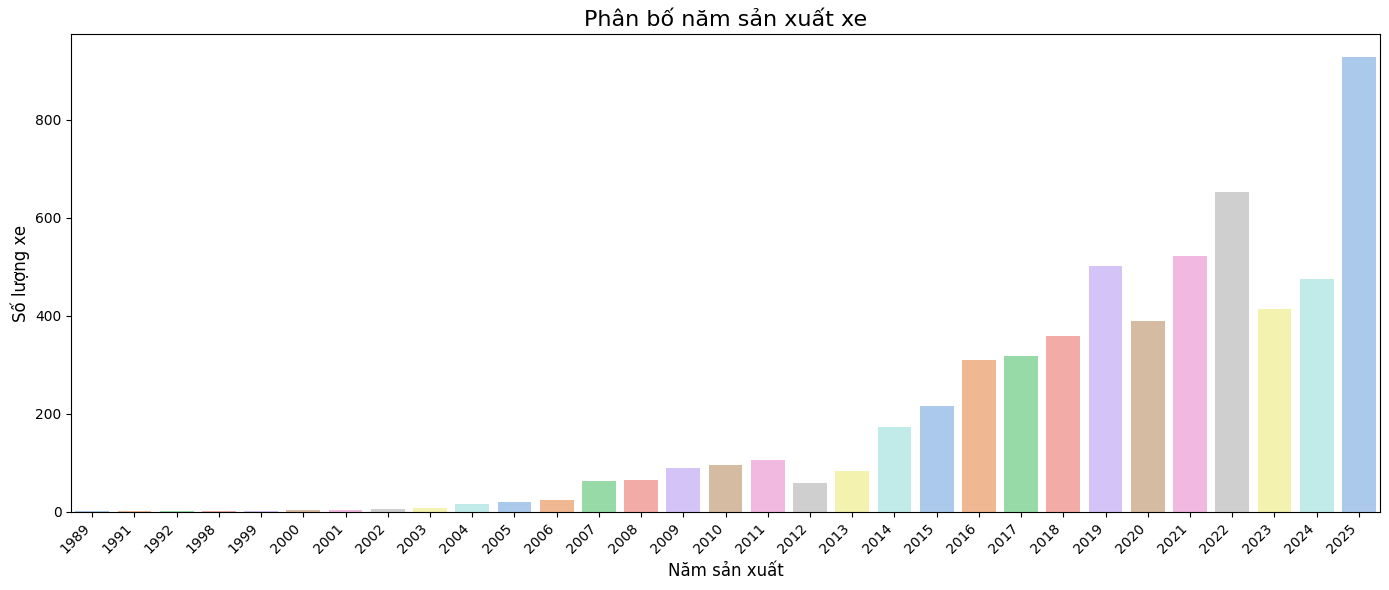

In [ ]:
plt.figure(figsize=(14,6)) 
# đảm bảo nam_sx là số hoặc string đã chuẩn
df['nam_sx'] = df['nam_sx'].astype(str)
order = sorted(df['nam_sx'].unique(), key=lambda x: int(x))  # sắp theo số

sns.countplot(data=df, x='nam_sx', order=order, palette='pastel')
plt.title('Phân bố năm sản xuất xe', fontsize=16)
plt.xlabel('Năm sản xuất', fontsize=12)
plt.ylabel('Số lượng xe', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)   # xoay 45 độ, canh phải
plt.tight_layout()
plt.savefig('../img/pl_3.png', dpi=450)
plt.show()


## BIỂU ĐỒ 4: Giá bán trung bình theo kiểu dáng

C:\Users\PC\AppData\Local\Temp\ipykernel_9108\263554259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='coolwarm')


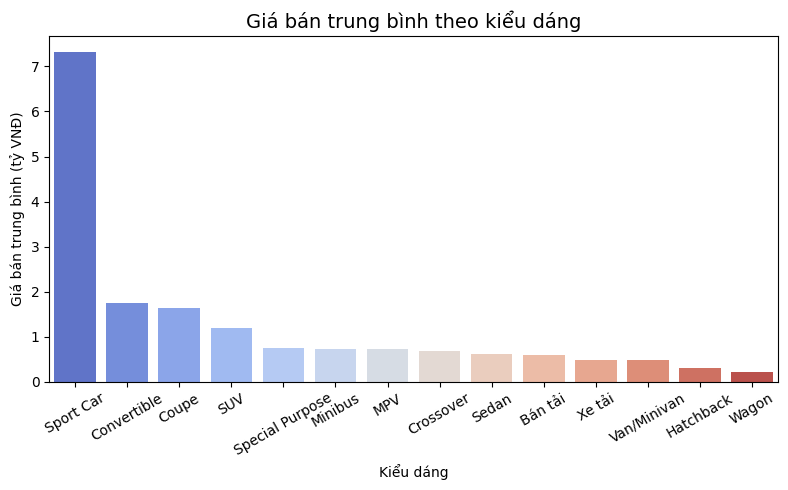

In [20]:
avg_price = df.groupby('kieu_dang')['gia_ban'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='coolwarm')
plt.title('Giá bán trung bình theo kiểu dáng', fontsize=14)
plt.xlabel('Kiểu dáng')
plt.ylabel('Giá bán trung bình (tỷ VNĐ)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('../img/pl_4.png', dpi=450)
plt.show()

## BIỂU ĐỒ 5: Phân bố xuất xứ xe

C:\Users\PC\AppData\Local\Temp\ipykernel_9108\1702590229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='xuat_xu', order=df['xuat_xu'].value_counts().index, palette='pastel')


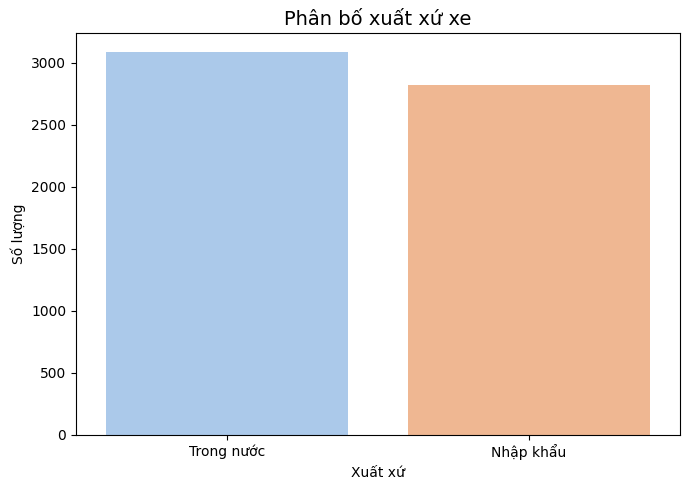

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='xuat_xu', order=df['xuat_xu'].value_counts().index, palette='pastel')
plt.title('Phân bố xuất xứ xe', fontsize=14)
plt.xlabel('Xuất xứ')
plt.ylabel('Số lượng')
plt.tight_layout()
plt.savefig('../img/pl_5.png', dpi=450)
plt.show()

## BIỂU ĐỒ 6: Phân bố số km chạy được

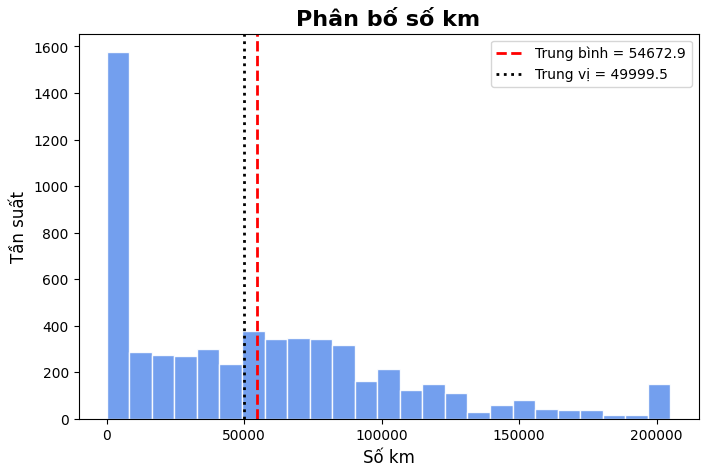

In [58]:
plt.figure(figsize=(8,5))
n, bins, patches = plt.hist(df.so_km, bins=25, color='cornflowerblue', edgecolor='white', alpha=0.9)

# Thêm đường trung bình
mean = df.so_km.mean()
median = df.so_km.median()

plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Trung bình = {mean:.1f}')
plt.axvline(median, color='black', linestyle=':', linewidth=2, label=f'Trung vị = {median:.1f}')

plt.title("Phân bố số km", fontsize=16, fontweight='bold')
plt.xlabel("Số km", fontsize=12)
plt.ylabel("Tần suất", fontsize=12)
plt.legend()
plt.savefig('../img/pl_6.png', dpi=450)
plt.show()

## BIỂU ĐỒ 7: Phân bố xe có giá dưới 1 tỉ đồng

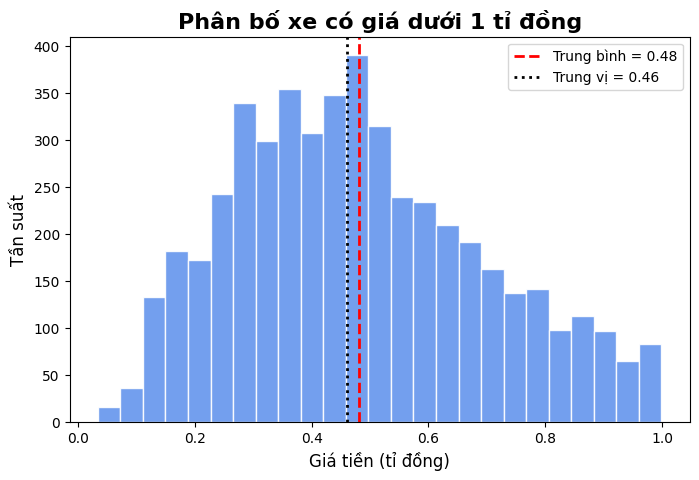

In [67]:
x = df.query('gia_ban < 1')

plt.figure(figsize=(8,5))
n, bins, patches = plt.hist(x.gia_ban, bins=25, color='cornflowerblue', edgecolor='white', alpha=0.9)

# Thêm đường trung bình
mean = x.gia_ban.mean()
median = x.gia_ban.median()

plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Trung bình = {mean:.2f}')
plt.axvline(median, color='black', linestyle=':', linewidth=2, label=f'Trung vị = {median:.2f}')

plt.title("Phân bố xe có giá dưới 1 tỉ đồng", fontsize=16, fontweight='bold')
plt.xlabel("Giá tiền (tỉ đồng)", fontsize=12)
plt.ylabel("Tần suất", fontsize=12)
plt.legend()
plt.savefig('../img/pl_7.png', dpi=450)
plt.show()